## K-Means

1. Implement the $k$-means algorithm as it was described in the lecture. More specifically, you should extend the `K_Means` class in the code skeleton by implementing the following methods:
    * `fit(X)`: Run the $k$-means algorithm on the dataset `X` that is given as a Numpy array of shape `(N, d)`, where `N` is the number of datapoints and `d` is their dimensionality. This method should not only assign the points in `X` to one of the $k$ clusters, but it should also compute the centroid of each cluster explicitely. That makes it easier to assign unseen data points to the clusters later. Have a look at the lecture slides for an implementation in pseudocode.
    * `predict(X)`: Assign each data point in `X` (again a Numpy array of shape `(M, d)`) to one of the clusters that were computed earlier in the `fit` method. That is, find the closest centroid for each point in `X` and assign it to the cluster that the centroid is representing.
   
   The class itself should also accept the following parameters that determine the behaviour of the algorithm:
    * `k`: The number of clusters to be found.
    * `initital_centroids`: This should either be a numpy array of shape `(k, d)`, explicitely containing the points that should be used as initial centroids or the string `'random'` indicating that $k$ *distinct* points should be chosen uniformly at random from the training data.
    * `max_iter`: The maximum number of iterations to perform in the `fit` method.


2. Run your $k$-means implementation on the three datasets generated in the code skeleton and visualize the results. In fact, all you have to do is add an instance of your `K_Means` class to the `clusterers` list. **Important:** Use $k=3$ and pass the initital centroids from the existing `initial_c` variable to your instance in order to obtain reproducible results that don't depend on any (pseudo-)random numbers.


3. Add another instance of the `K_Means` class to the `clusterers` list, but this time with `initial_centroids='random'`. Re-run the experiment a few times and look at the visualizations for this instance.


4. With high probability, the clusters that you observed in part 3 were quite different from run to run. Indeed, the quality of a clustering returned by the plain $k$-means algorithm depends highly on the choice of initial centroids. The shortcomings of choosing initial centroids uniformly at random can be mitigated to some degree by re-running the algorithm several times with different starting points and then choosing the best result among all runs according to some metric. However, this can be quite computationally expensive.

   Fortunately, $k$-means has been around for quite some time and many smart and creative people have proposed strategies to find better initial centroids. The approach we are going to take a closer look at is called $k$-means++. It is based on the observation that the initial centroids should be far apart from each other and evenly spread among the data to get a decent result in the end. Basically, the $k$ centroids are selected one at time, according to the following steps:
    1. The first centroid $\mathbf{c}^{(1)}$ is selected uniformly at random from the training data.
    2. For $1 < l \leq k$, we compute the minimal (squared) distance for each data point $\mathbf{x}^{(i)} \in X$ to one of the already chosen centroids:
    \begin{equation*}
        d^{(i)} = \min_{l' < l} \left\lVert \mathbf{x}^{(i)} - \mathbf{c}^{(l')} \right\rVert^2
    \end{equation*}
    3. We select $\mathbf{c}^{(l)} = \mathbf{x}^{(i)}$ with probability $d^{(i)} / \sum_{j=1}^{N} d^{(j)}$ and increment $l$.
    4. Once we have found $k$ centroids $\mathbf{c}^{(1)}, \mathbf{c}^{(2)}, \ldots, \mathbf{c}^{(k)}$ by repeating steps B and C, we can use them as the starting point for the regular $k$-means iteration.
    
   Implement $k$-means++ by allowing the option `initial_centroids='kmeans++'` in your `K_Means` class. Add an instance with this argument to the visualizations and see if it gives us more consistent results.


5. As you have surely noticed by now, $k$-means fails to find a good clustering if one of the clusters is not convex. Essentially, $k$-means suffers from the same drawbacks that we identified for linear classifiers, but as you have seen in the lecture, it is possible to kernelize $k$-means just like we kernelized linear classifiers: Given a feature map $\phi\colon \mathbb{R}^d \to \mathcal{H}$ and the corresponding kernel function $k\colon \mathbb{R}^d \times \mathbb{R}^d \to \mathbb{R}$, we can compute the (squared) distance between two points $\phi(\mathbf{x}) \in \mathcal{H}$ and $\phi(\mathbf{x}') \in \mathcal{H}$ in the (possibly) high-dimensional Hilbert space $\mathcal{H}$ as
\begin{equation*}
    \lVert \phi(\mathbf{x}) - \phi(\mathbf{x}') \rVert^2 = \langle \phi(\mathbf{x}), \phi(\mathbf{x}) \rangle - 2\langle \phi(\mathbf{x}), \phi(\mathbf{x}') \rangle + \langle \phi(\mathbf{x}'), \phi(\mathbf{x}') \rangle = k(\mathbf{x}, \mathbf{x}) - 2k(\mathbf{x}, \mathbf{x}') + k(\mathbf{x}', \mathbf{x}')
\end{equation*}

   However, we cannot explicitely compute the centroid $\mathbf{c} \in \mathcal{H}$ of a non-empty cluster $C$ if we cannot compute the feature map $\phi$, as it is the case for the RBF kernel, for example. In theory, we can still write
\begin{equation*}
    \mathbf{c} = \frac{1}{\lvert C \rvert} \sum_{\mathbf{x}' \in C} \phi(\mathbf{x}')
\end{equation*}
and if we plug that into the distance computation above we get that
\begin{equation*}
    \lVert \phi(\mathbf{x}) - \mathbf{c} \rVert^2 = \langle \phi(\mathbf{x}), \phi(\mathbf{x}) \rangle - \frac{2}{\lvert C\rvert} \sum_{\mathbf{x}' \in C} \langle \phi(\mathbf{x}), \phi(\mathbf{x}') \rangle + \frac{1}{\lvert C\rvert^2} \sum_{\mathbf{x}', \mathbf{x}'' \in C} \langle \phi(\mathbf{x}'), \phi(\mathbf{x}'') \rangle = k(\mathbf{x}, \mathbf{x}) - \frac{2}{\lvert C\rvert} \sum_{\mathbf{x}' \in C} k(\mathbf{x}, \mathbf{x}') + \frac{1}{\lvert C\rvert^2} \sum_{\mathbf{x}', \mathbf{x}'' \in C} k(\mathbf{x}', \mathbf{x}''),
\end{equation*}
meaning that we can actually compute the distance of an arbitrary point to a centroid implicitly represented by the points belonging to its cluster.

   Your job is to implement the `Kernel_K_Means` class analogously to the `K_Means` class in part 1, except that you can no longer compute the centroids explicitely. That means we must also make two changes to the parameters that can be passed to the class:
    * `initial_assignment` replaces `initial_centroids`. It can either be a Numpy array of size `N` with integer values in the set $\{0, 1, \ldots k-1\}$, indicating the cluster each datapoint belongs to or `None`, in which case you should choose such an array at random.
    * `kernel_func`: This function must take two data matrices `X1, X2` as Numpy arrays of shapes `(N, d)`, `(M, d)` and it must return the kernel matrix `K` of size `(N, M)` with `K[i, j] = k(X1[i], X2[j])`.
   
   Finally, add two instances of the `Kernel_K_Means` class using the RBF kernel ($\sigma=0.75$) and $k=3$ to the `clusterers` list. One of them should use the initial cluster assignment from the `initial_a` variable for reproducible results, the other one should randomly choose an initial assignment.

5
2
4
3
4
3
12
5
5
5
6
5


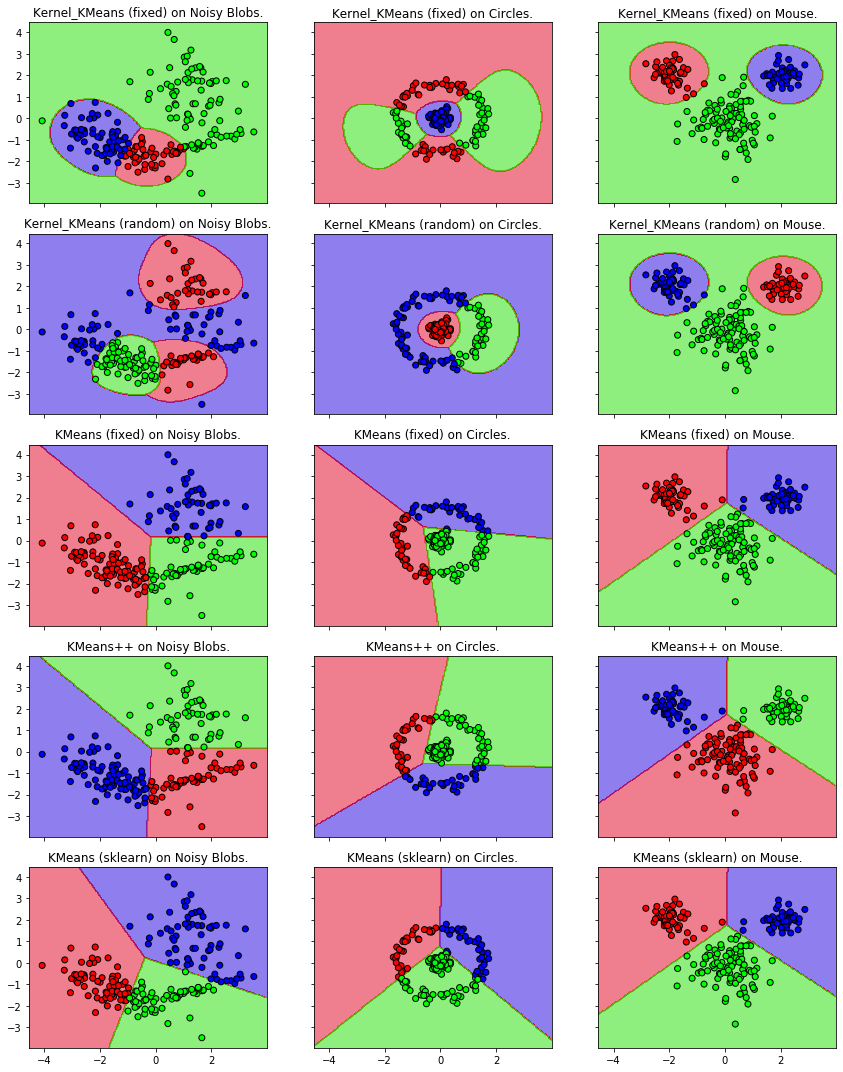

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.datasets import make_classification, make_circles, make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.base import BaseEstimator
from sklearn.gaussian_process.kernels import RBF


class K_Means(BaseEstimator):
    def __init__(self, k, initial_centroids='random', max_iter=300):
        super(K_Means, self).__init__()
        
        self.k = k
        self.initial_centroids = initial_centroids
        self.max_iter = max_iter

    def fit(self, X):
        k = self.k
        if str(self.initial_centroids) == 'random':
            idx = np.random.randint(0, high=X.shape[0], size=(k), dtype=int)
            c = X[idx,:]
        elif str(self.initial_centroids) == 'kmeans++':
            c = np.zeros((k,X.shape[1]))
            idx = np.random.randint(0,high = X.shape[0],size = 1, dtype = int)
            c[0] = X[idx,:]
            for l in range(1,k):
                d = np.zeros(l)
                d_i = np.zeros(X.shape[0])
                for i in range(X.shape[0]):
                    d = np.linalg.norm(np.array([X[i,:] for t in range(l)])-c[0:l], axis = 1)**2
                    d_i[i] = min(d)
                c[l] = X[np.random.choice(X.shape[0],p = d_i/sum(d_i)),:]
        else:
            c = self.initial_centroids

        itera = 0
        y = np.zeros((X.shape[0]), dtype = int)
        while itera <= self.max_iter:
            change = 0
            for i in range(X.shape[0]):
                x_i = np.array([X[i,:] for x in range(k)])
               
                new_val = np.argmin(np.linalg.norm(x_i-c, axis = 1)**2)
                if np.linalg.norm(y[i]- new_val) != 0:
                    change = 1
                y[i] = int(new_val)
            for j in range(k):
               
                new_val = np.mean(X[y==j,:],axis = 0)
                if np.linalg.norm(c[j]- new_val) != 0:
                    change = 1
                c[j] = new_val
            itera +=1
            if change == 0:
                self.c = c
                print(itera)
                return y
        self.c = c
        return y
        
    def predict(self, X):
        k = self.k
        y = np.zeros(X.shape[0],dtype = int)
        c = self.c
        for i in range(X.shape[0]):
            x_i = np.array([X[i,:] for x in range(k)])
            new_val = np.argmin(np.linalg.norm(x_i-c, axis = 1)**2)
            y[i] = int(new_val)
        return y
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

class Kernel_K_Means(BaseEstimator):
    def __init__(self, k, kernel_func, initial_assignment=None, max_iter=300):
        super(Kernel_K_Means, self).__init__()
        
        self.k = k
        self.initial_assignment = initial_assignment
        self.max_iter = max_iter
        self.kernel_func = kernel_func
        

        
    def fit(self, X):
        self.data = X
        k = self.k
        if str(self.initial_assignment) == str(None):
            c = np.random.randint(0, high=k, size=(X.shape[0]), dtype=int)
            
        else: c = self.initial_assignment
       
        itera = 0
        y = np.zeros((X.shape[0]), dtype = int)
        while itera <= self.max_iter:
            change = 0

            for i in range(X.shape[0]):
                new_val = np.zeros(k)
                for j in range(k):

                    K1 = kernel_func(X[i,:],X[c==j,:])
                    K2 = kernel_func(X[c == j])
                    num_C = X[c==j,:].shape[0]

                    new_val[j] = kernel_func(np.reshape(X[i,:],(1,2)))[0][0]-2/num_C * np.sum(K1, axis = 1)[0]+1/num_C**2*np.sum(K2,axis = (0,1))

                new_idx = np.argmin(new_val)

                c[i] = new_idx

                if np.linalg.norm(y[i]- new_idx) != 0:
                    change = 1
                y[i] = int(new_idx)
            itera +=1
            if change == 0:
                self.c = c
                print(itera)

                return c
        self.c = c
        
        return c

        
    def predict(self, X):
        k = self.k
        c = self.c
        X_dat = self.data
        out = np.zeros(X.shape[0], dtype = int)
        for i in range(X.shape[0]):
            new_val = np.zeros(k)
            for j in range(k):

                x_i = np.array([X[i,:] for x in range(k)])
                K1 = kernel_func(X[i,:],X_dat[c==j,:])
                K2 = kernel_func(X_dat[c == j,:])
                num_C = X_dat[c==j].shape[0]

                new_val[j] = kernel_func(np.reshape(X[i,:],(1,2))[0][0])-2/num_C * np.sum(K1, axis = 1)+1/num_C**2*np.sum(K2,axis = (0,1))

            out[i] = np.argmin(new_val)

        return out
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)
    
def kernel_func(X1,X2 = None):
    #print(X1)
    #print(X2)
    #print(X1.shape)
    kern_class = RBF(length_scale=0.75, length_scale_bounds=(1e-05, 100000.0))
    return kern_class.__call__(X1,X2)


# Generate toy data
def generate_data():
    n = 200
    n_classes = 3
    X, Y = make_classification(n, n_features=2, n_redundant=0, n_classes=n_classes, weights=(0.5, 0.3, 0.2),
                               class_sep=1.3, n_clusters_per_class=1, random_state=12345)
    yield ('Noisy Blobs', X)
    
    X, Y = make_circles(n, noise=0.08, factor=0.1, random_state=1234)
    yield ('Circles', X*1.6)
    
    X, Y = make_blobs([n//2, n//4, n//4], n_features=2, centers=[[0, 0], [-2, 2], [2, 2]],
                               cluster_std=[0.8, 0.35, 0.35], random_state=1234)
    yield ('Mouse', X)
datasets = list(generate_data())

initial_c = np.array([[ 1.57747042,  0.04248975],
                      [-1.38669281, -0.45473879],
                      [ 0.28039302, -0.2942349 ]])
initial_a = np.array([0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0,
                      2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1,
                      1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0,
                      1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2,
                      1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0,
                      2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2,
                      2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2,
                      1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0])
clusterers = [('Kernel_KMeans (fixed)', Kernel_K_Means(k = 3, kernel_func = kernel_func, initial_assignment=initial_a, max_iter=300)),
              ('Kernel_KMeans (random)', Kernel_K_Means(k = 3, kernel_func = kernel_func, initial_assignment=None, max_iter=300)),
              ('KMeans (fixed)', K_Means(k=3, initial_centroids=initial_c, max_iter = 200)),
              ('KMeans++', K_Means(k=3, initial_centroids='kmeans++', max_iter = 200)),
              ('KMeans (sklearn)', KMeans(n_clusters=3, n_init=1, init=initial_c))]
              # TODO: replace the above line with your own implementations, for example:
              # ('KMeans (fixed)', K_Means(k=3, initial_centroids=initial_c)),
             

# Plot decision surface
# First generate grid
res = 200  # Resolution of the grid in cells
x_max, y_max = np.max(np.stack([np.max(X, axis=0) for _, X in datasets]), axis=0)
x_min, y_min = np.min(np.stack([np.min(X, axis=0) for _, X in datasets]), axis=0)
x_min, x_max = x_min - (x_max - x_min) * 0.0625, x_max + (x_max - x_min) * 0.0625
y_min, y_max = y_min - (y_max - y_min) * 0.0625, y_max + (y_max - y_min) * 0.0625
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, res),
                             np.linspace(y_min, y_max, res))
# Get test array from grid
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

cmap = colors.ListedColormap([[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])
rows = len(clusterers)
columns = len(datasets)
fig, axes = plt.subplots(rows, columns, sharex=True, sharey=True, figsize=(12, 9/columns*rows), squeeze=False)
for (clu_name, clu), row_axes in zip(clusterers, axes):
    for (ds_name, X), ax in zip(datasets, row_axes):
        clusters = clu.fit_predict(X)
        if hasattr(clu, 'predict'):
            grid_out = clu.predict(grid_input).reshape(grid_x.shape)
            ax.contourf(grid_x, grid_y, grid_out%4, alpha=0.5, cmap=plt.cm.brg, vmin=0, vmax=2)
        ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

        ax.set_title(f'{clu_name:s} on {ds_name:s}.')
       
        ax.scatter(X[:, 0], X[:, 1], c=cmap(clusters%4), edgecolor='k')
fig.tight_layout()
fig.savefig('kmeans_plots.pdf')
plt.show()
plt.close(fig)